Kelompok 10 (Analisis Rumah Cekk) :
* Annisa Rosdiyana (11190930000059)
* Paramita Citra Indah Mulia (11190930000069)
* Adrian Edenito (11190930000063)
* Pramudya Tabah Ananda (11190930000068)
* Figo Alsistani (11190930000054)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://github.com/annisaarss/House-Analytics-Kelompok10/raw/main/Tugas%2001%20Data%20Mining%20-%20Kelompok%2010.csv')

In [3]:
# cek data awal
data.head()

,no,tgl_Iklan,url,harga_juta,kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,02/04/21,https://www.rumah.com/listing-properti/dijual-...,5000,Bali,290,300,4,5.0,0,0,1,1,13200.0,SHM,Rumah style villa,Rumah Style Villa Lantai 2 Minimalis Kawasan O...
1,2,02/04/21,https://www.rumah.com/listing-properti/dijual-...,3500,Bali,200,214,3,2.0,1,1,1,1,5500.0,SHM,Rumah dijual,Rumah Lantai 2 Minimalis Siap Huni\nDi jual ce...
2,3,02/04/21,https://www.rumah.com/listing-properti/dijual-...,850,Bali,100,80,3,2.0,0,0,1,0,1300.0,SHM,Rumah Harga Miring lokasi Jimbaran,Rumah Murah Harga Miring Lokasi Jimbaran\nDiju...
3,4,02/04/21,https://www.rumah.com/listing-properti/dijual-...,1572,Bali,105,69,2,2.0,0,0,1,0,NaN,SHM,"RUMAH STRATEGIS, ULUWATU, BALI","Rumah Strategis, Uluwatu, Bali\nRumah Strategi..."
4,5,04/04/21,https://www.rumah.com/listing-properti/dijual-...,505,Bali,50,50,2,2.0,0,0,1,0,1300.0,SHM,RUMAH DUA LANTAI MINIMALIS MODERN BERLOKASI SA...,Rumah Baru 2 Lantai Murah 2 Kamar Strategis Nu...


In [4]:
# cek data terakhir
data.tail(9)

,no,tgl_Iklan,url,harga_juta,kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
91,92,31/03/21,https://www.rumah.com/listing-properti/dijual-...,2400,Bali,105,76,2,2.0,0,0,1,0,NaN,SHGB,DIJUAL RUMAH CIPUTRA BALI EXCLUSIVE,"Lokasi Strategis, On Progress\nLuas tanah 105 ..."
92,93,29/03/21,https://www.rumah.com/listing-properti/dijual-...,2300,Bali,105,76,2,2.0,0,0,1,0,2200.0,SHM,"Tabanan, Tabanan, Bali",Dijual Rumah 2 Lt Elite Baru Minimalis Strateg...
93,94,31/03/21,https://www.rumah.com/listing-properti/dijual-...,8000,Bali,990,700,6,3.0,0,0,1,0,3500.0,SHM,TABANAN-BALI,Jual Komersial Area Di Pusat Kota Tabanan Bali...
94,95,31/03/21,https://www.rumah.com/listing-properti/dijual-...,330,Bali,50,45,2,1.0,0,0,1,0,1300.0,SHM,"Batuaji, Tabanan",Dijual Rumah Townhouse Di Batuaji Tabanan Bali...
95,96,25/03/21,https://www.rumah.com/listing-properti/dijual-...,650,Bali,100,70,2,2.0,0,0,1,0,1300.0,SHM,"Rumah Murah Nyaman, Asri, Strategis di Tabanan...","Rumah Murah Nyaman, Asri, Strategis Di Tabanan..."
96,97,25/03/21,https://www.rumah.com/listing-properti/dijual-...,320,Bali,78,60,2,1.0,0,0,1,0,900.0,SHM,"Dijual Rumah Minimalis di Kediri, Tabanan, Bali","Dijual Rumah Minimalis Di Kediri, Tabanan, Bal..."
97,98,25/03/21,https://www.rumah.com/listing-properti/dijual-...,650,Bali,100,48,2,2.0,0,0,1,0,3500.0,SHM,Kedungu,Rumah Industrial Style Di Tabanan Dekat Perere...
98,99,02/04/21,https://www.rumah.com/listing-properti/dijual-...,5800,Bali,250,197,3,3.0,0,0,1,0,4400.0,SHGB,Cluster Nivata Di Ciputra Beach Resort,"Great location in Tabanan area, lokasi dekat d..."
99,100,31/03/21,https://www.rumah.com/listing-properti/dijual-...,3500,Bali,200,150,3,3.0,0,0,1,0,3500.0,SHM,Dijual Freehold ubud selatan 10 menit dari ubu...,Sepuluh Menit Dari Ubud Central\nDijual freeho...


In [5]:
# cek tipe data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# cek ukuran data
N,P = data.shape
print('baris = ', N, 'kolom = ',P)

baris =  100 kolom =  17


In [7]:
# cek tipe masing masing variabel menggunakan data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          100 non-null    int64  
 1   tgl_Iklan   100 non-null    object 
 2   url         100 non-null    object 
 3   harga_juta  100 non-null    int64  
 4   kota        100 non-null    object 
 5   LT          100 non-null    int64  
 6   LB          100 non-null    int64  
 7   KT          100 non-null    int64  
 8   KM          99 non-null     float64
 9   KTP         100 non-null    int64  
 10  KMP         100 non-null    int64  
 11  carport     100 non-null    int64  
 12  garasi      100 non-null    int64  
 13  listrik     91 non-null     float64
 14  surat       100 non-null    object 
 15  judul       100 non-null    object 
 16  deskripsi   100 non-null    object 
dtypes: float64(2), int64(9), object(6)
memory usage: 13.4+ KB


Variabel yang tidak dibutuhkan untuk dianalisis yaitu :
* no (karena mengakibatkan tidak bisa mendeteksi duplikasi data)
* tgl iklan (karena sebagian besar menggunakan data terbaru, sehingga sebagian besar tanggal sama)
* url (karena mengakibatkan tidak bisa mendeteksi duplikasi data)
* kota (karena semua data memiliki kota yang sama)
* deskripsi (karena memiliki isi yang terlalu panjang dan tidak relevan)
* judul (karena memiliki isi yang terlalu panjang, tidak relevan, dan tipe data nya tidak bisa diubah menjadi numerik/kategori)


### **Menyeleksi variabel yang dibutuhkan**

In [8]:
#drop variabel 
data.drop(["no", "tgl_Iklan", "url", "judul", "deskripsi", "kota"], axis=1, inplace=True)

In [9]:
#cek data berhasil di drop
data.head()

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,5000,290,300,4,5.0,0,0,1,1,13200.0,SHM
1,3500,200,214,3,2.0,1,1,1,1,5500.0,SHM
2,850,100,80,3,2.0,0,0,1,0,1300.0,SHM
3,1572,105,69,2,2.0,0,0,1,0,NaN,SHM
4,505,50,50,2,2.0,0,0,1,0,1300.0,SHM


### **Mengubah tipe data kategori**

In [10]:
#cek tipe data menggunakan data.dtypes
data.dtypes

harga_juta      int64
LT              int64
LB              int64
KT              int64
KM            float64
KTP             int64
KMP             int64
carport         int64
garasi          int64
listrik       float64
surat          object
dtype: object

In [11]:
# ubah tipe data surat dan listrik menjadi category
data['surat'] = data['surat'].astype('category')

In [12]:
# cek data duplikat
data.duplicated().sum()

0

### **Membuat dataframe untuk variabel numerik dan category**

In [13]:
# Membuat data frame untuk variabel yang bertipe numerik
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,5000,290,300,4,5.0,0,0,1,1,13200.0
1,3500,200,214,3,2.0,1,1,1,1,5500.0
2,850,100,80,3,2.0,0,0,1,0,1300.0
3,1572,105,69,2,2.0,0,0,1,0,NaN
4,505,50,50,2,2.0,0,0,1,0,1300.0


In [14]:
# Membuat data frame dari variabel yang bertipe kategorik
data_cat = data.select_dtypes(include=['category'])
data_cat.head()

,surat
0,SHM
1,SHM
2,SHM
3,SHM
4,SHM


In [15]:
# Membuat variabel dum yang berisi data surat menggunakan dummies
dum = pd.get_dummies(data['surat'],prefix='surat')
dum.head()

,surat_SHGB,surat_SHM
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### **Menggabungkan data dan membuatnya menjadi 2 dataframe (untuk outliers dan normal)**

In [16]:
# Menggabungkan (concat) data 'data' dan 'dum' ke dalam variabel data2
data2 = pd.concat([data, dum], axis = 1)
data2.head().transpose()

,0,1,2,3,4
harga_juta,5000,3500,850,1572,505
LT,290,200,100,105,50
LB,300,214,80,69,50
KT,4,3,3,2,2
KM,5,2,2,2,2
KTP,0,1,0,0,0
KMP,0,1,0,0,0
carport,1,1,1,1,1
garasi,1,1,0,0,0
listrik,13200,5500,1300,NaN,1300


In [17]:
data3 = pd.concat([data, dum], axis = 1)
data3.head().transpose()

,0,1,2,3,4
harga_juta,5000,3500,850,1572,505
LT,290,200,100,105,50
LB,300,214,80,69,50
KT,4,3,3,2,2
KM,5,2,2,2,2
KTP,0,1,0,0,0
KMP,0,1,0,0,0
carport,1,1,1,1,1
garasi,1,1,0,0,0
listrik,13200,5500,1300,NaN,1300


### **Cek korelasi antar variabel**

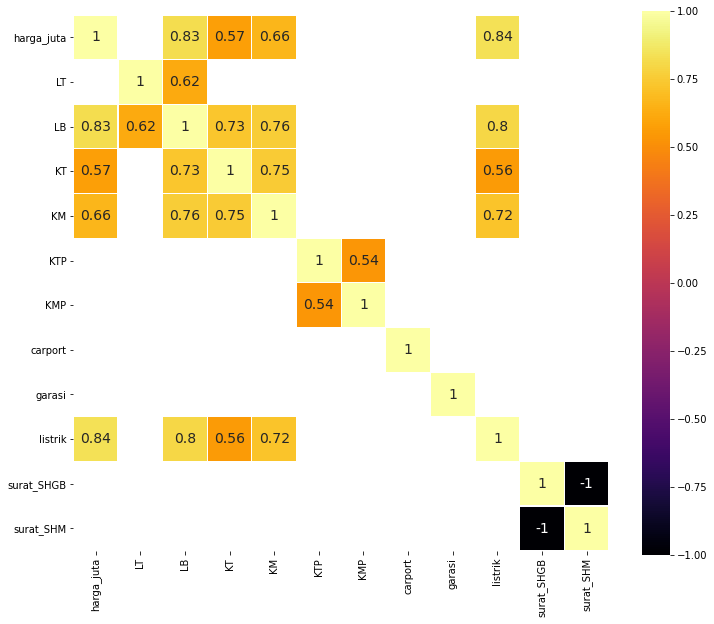

In [18]:
# Cek korelasi antar kolom menggunakan heatmap
corr = data2.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Sebelum memisahkan outliers dan mengisi missing value, didapat harga memiliki korelasi dari yang tertinggi yaitu listrik, LB, KM, KT. Dan memiliki korelasi yang rendah dengan LT, KTP, KMP, garasi, dan surat

### **Mendeteksi outliers**

In [19]:
# Memeriksa outlier menggunakan boxplot dalam skala harga juta rupiah
import plotly.express as px

fig = px.box(data2, x="surat", y="harga_juta",title='Tabel Outlier Harga Rumah (juta) berdasarkan jenis Surat',labels={
                     "harga_juta": "Harga Rumah(juta)",
                     "surat": "Jenis Sertifikat Rumah",
                 })
fig.show()

Terdapat outliers pada rumah berjenis sertifikat SHM. Namun pada jenis sertifikat SHGB tidak terdapat outliers

In [20]:
# Memeriksa outliers di harga menggunakan IQR
from numpy import quantile
Q1 = data2.harga_juta.quantile(0.25)
Q3 = data2.harga_juta.quantile(0.75)
IQR = Q3 - Q1

no_outliers = data2.harga_juta[(Q1 - 1.5*IQR < data2.harga_juta) &  (data2.harga_juta < Q3 + 1.5*IQR)]
outliers = data2.harga_juta[(Q1 - 1.5*IQR >= data2.harga_juta) |  (data2.harga_juta >= Q3 + 1.5*IQR)]
outliers

40     8500
49    28000
50     8700
52    12000
56     9800
58    11000
59    40000
68     8800
80    59000
93     8000
Name: harga_juta, dtype: int64

In [21]:
# Drop baris yang mengandung harga outliers
for i in outliers :
  data2.drop(data2[data2.harga_juta == i].index, inplace=True)

In [22]:
data2.head()

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,surat_SHGB,surat_SHM
0,5000,290,300,4,5.0,0,0,1,1,13200.0,SHM,0,1
1,3500,200,214,3,2.0,1,1,1,1,5500.0,SHM,0,1
2,850,100,80,3,2.0,0,0,1,0,1300.0,SHM,0,1
3,1572,105,69,2,2.0,0,0,1,0,NaN,SHM,0,1
4,505,50,50,2,2.0,0,0,1,0,1300.0,SHM,0,1


In [23]:
# cek ukuran data untuk memastikan apakah outliers berhasil di drop
N,P = data2.shape
print('baris = ', N, 'kolom = ',P)

baris =  90 kolom =  13


In [24]:
# Membuat data3 menjadi hanya berisi outliers
for i in no_outliers :
  data3.drop(data3[data3.harga_juta == i].index, inplace=True)

In [25]:
# cek ukuran data untuk memastikan apakah benar hanya berisi outliers
N,P = data3.shape
print('baris = ', N, 'kolom = ',P)

baris =  10 kolom =  13


### **Mengisi missing value untuk data normal (non outliers)**

---



In [26]:
data2.isnull().sum()

harga_juta    0
LT            0
LB            0
KT            0
KM            1
KTP           0
KMP           0
carport       0
garasi        0
listrik       8
surat         0
surat_SHGB    0
surat_SHM     0
dtype: int64

In [27]:
# sebelum di isi outliers
data2

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,surat_SHGB,surat_SHM
0,5000,290,300,4,5.0,0,0,1,1,13200.0,SHM,0,1
1,3500,200,214,3,2.0,1,1,1,1,5500.0,SHM,0,1
2,850,100,80,3,2.0,0,0,1,0,1300.0,SHM,0,1
3,1572,105,69,2,2.0,0,0,1,0,NaN,SHM,0,1
4,505,50,50,2,2.0,0,0,1,0,1300.0,SHM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,650,100,70,2,2.0,0,0,1,0,1300.0,SHM,0,1
96,320,78,60,2,1.0,0,0,1,0,900.0,SHM,0,1
97,650,100,48,2,2.0,0,0,1,0,3500.0,SHM,0,1
98,5800,250,197,3,3.0,0,0,1,0,4400.0,SHGB,1,0


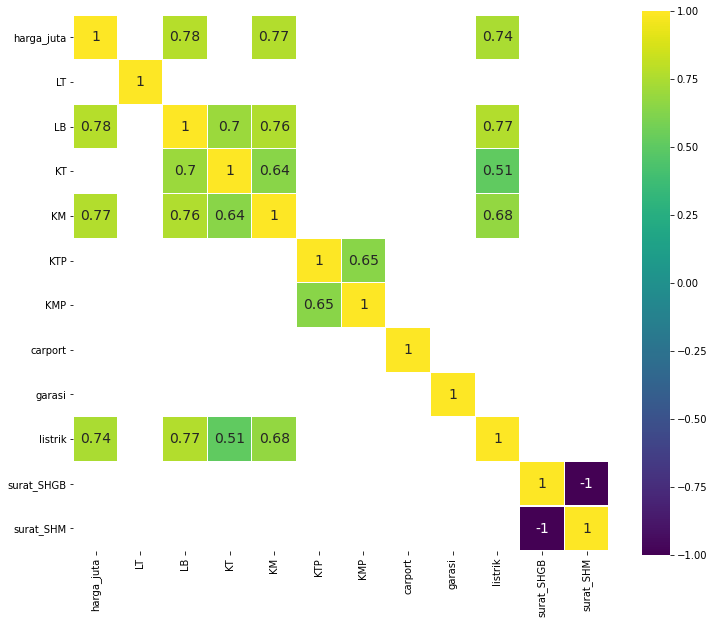

In [28]:
#cek korelasi antar variabel di data2
corr = data2.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

KM (Kamar Mandi) memiliki korelasi tertinggi dengan harga_juta (Harga Rumah). Dan listrik memiliki korelasi tertinggi dengan LB (Luas Bangunan)


#### **Mengisi missing value listrik**

In [29]:
# membuat subset dari data listrik dan LB yang tidak memiliki missing value
df_listrik_lb = data2.dropna(axis=0, subset=['listrik','LB'])
df_listrik_lb = df_listrik_lb.loc[:, ['listrik','LB']]

# menemukan baris dengan listrik yang missing
missing_listrik = data2['listrik'].isnull()
# membuat LB yang listrik nya missing
lb_misslistrik = pd.DataFrame(data2['LB'][missing_listrik])

In [30]:
x = df_listrik_lb['LB']
y = df_listrik_lb['listrik']

# train model linear regressing listrik pada LB dimana menggunakan 80% training dan 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

# fit linear model
lm = LinearRegression().fit(x_train, y_train)
# menggunakan fit model dan data LB (lb_misslistrik) untuk prediksi listrik yang missing
listrik_pred = lm.predict(lb_misslistrik)
print(listrik_pred)

[2001.77529071 2639.116278    963.14553364 2757.14238676 5094.05934017
 1222.80297291 2001.77529071 2167.01184297]


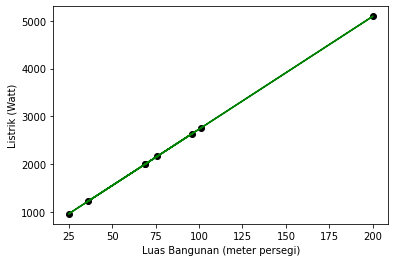

In [31]:
# visualisasikan imputasi listrik
plt.scatter(lb_misslistrik, listrik_pred , color='black')
plt.plot(lb_misslistrik, listrik_pred, color='green')
plt.xlabel('Luas Bangunan (meter persegi)')
plt.ylabel('Listrik (Watt)')
plt.show()

In [32]:
# Imputasi dengan hasil prediksi
listrik_pred = listrik_pred.astype('int')
print(listrik_pred)
data2.loc[data2.listrik.isnull(),'listrik'] = listrik_pred

[2001 2639  963 2757 5094 1222 2001 2167]


In [33]:
# Mengecek apakah missing value listrik berhasil di input
data2.isnull().sum()

harga_juta    0
LT            0
LB            0
KT            0
KM            1
KTP           0
KMP           0
carport       0
garasi        0
listrik       0
surat         0
surat_SHGB    0
surat_SHM     0
dtype: int64

In [34]:
# setelah dihilangkan outliers
data2

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,surat_SHGB,surat_SHM
0,5000,290,300,4,5.0,0,0,1,1,13200.0,SHM,0,1
1,3500,200,214,3,2.0,1,1,1,1,5500.0,SHM,0,1
2,850,100,80,3,2.0,0,0,1,0,1300.0,SHM,0,1
3,1572,105,69,2,2.0,0,0,1,0,2001.0,SHM,0,1
4,505,50,50,2,2.0,0,0,1,0,1300.0,SHM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,650,100,70,2,2.0,0,0,1,0,1300.0,SHM,0,1
96,320,78,60,2,1.0,0,0,1,0,900.0,SHM,0,1
97,650,100,48,2,2.0,0,0,1,0,3500.0,SHM,0,1
98,5800,250,197,3,3.0,0,0,1,0,4400.0,SHGB,1,0


#### **Missing value Kamar mandi (KM)**

In [35]:
# Imputasi KM menggunakan median
data2['KM'].fillna(data2.KM.median(),inplace=True)
data2

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,surat_SHGB,surat_SHM
0,5000,290,300,4,5.0,0,0,1,1,13200.0,SHM,0,1
1,3500,200,214,3,2.0,1,1,1,1,5500.0,SHM,0,1
2,850,100,80,3,2.0,0,0,1,0,1300.0,SHM,0,1
3,1572,105,69,2,2.0,0,0,1,0,2001.0,SHM,0,1
4,505,50,50,2,2.0,0,0,1,0,1300.0,SHM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,650,100,70,2,2.0,0,0,1,0,1300.0,SHM,0,1
96,320,78,60,2,1.0,0,0,1,0,900.0,SHM,0,1
97,650,100,48,2,2.0,0,0,1,0,3500.0,SHM,0,1
98,5800,250,197,3,3.0,0,0,1,0,4400.0,SHGB,1,0


In [36]:
# Mengecek apakah missing value KM berhasil di imputasi
data2.isnull().sum()

harga_juta    0
LT            0
LB            0
KT            0
KM            0
KTP           0
KMP           0
carport       0
garasi        0
listrik       0
surat         0
surat_SHGB    0
surat_SHM     0
dtype: int64

### **Mengisi missing value di data3 (data outlier)**

In [37]:
data3.isnull().sum()

harga_juta    0
LT            0
LB            0
KT            0
KM            0
KTP           0
KMP           0
carport       0
garasi        0
listrik       1
surat         0
surat_SHGB    0
surat_SHM     0
dtype: int64

In [38]:
# Imputasi KM menggunakan median
data3['listrik'].fillna(data3.listrik.median(),inplace=True)
data3

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,surat_SHGB,surat_SHM
40,8500,446,420,3,4.0,0,0,1,0,13200.0,SHM,0,1
49,28000,674,1000,3,4.0,1,0,1,1,23000.0,SHM,0,1
50,8700,1000,800,4,4.0,0,0,1,0,4400.0,SHM,0,1
52,12000,500,550,4,5.0,0,0,1,0,10000.0,SHM,0,1
56,9800,300,290,3,3.0,0,1,1,0,13200.0,SHM,0,1
58,11000,485,300,4,4.0,0,0,1,1,16000.0,SHM,0,1
59,40000,649,1000,5,5.0,0,0,1,1,23000.0,SHM,0,1
68,8800,635,850,6,6.0,0,0,4,0,6600.0,SHGB,1,0
80,59000,627,1050,7,8.0,0,0,1,1,23000.0,SHM,0,1
93,8000,990,700,6,3.0,0,0,1,0,3500.0,SHM,0,1


###**Statistika Deskriptif**

In [39]:
data2.describe()

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat_SHGB,surat_SHM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1885.766667,180.811111,124.711111,2.644444,2.144444,0.100000,0.044444,0.955556,0.188889,3123.266667,0.044444,0.955556
std,1379.846271,238.362056,81.559001,0.797624,1.044634,0.301681,0.207235,0.332208,0.421193,2325.456895,0.207235,0.207235
min,220.000000,42.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000
25%,850.000000,100.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000,0.000000,1.000000
50%,1572.000000,117.000000,100.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,0.000000,1.000000
75%,2475.000000,187.500000,180.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,4175.000000,0.000000,1.000000
max,6300.000000,1530.000000,450.000000,5.000000,5.000000,1.000000,1.000000,2.000000,2.000000,13200.000000,1.000000,1.000000


In [40]:
data2.describe(include='all')

,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,surat_SHGB,surat_SHM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN,NaN
mean,1885.766667,180.811111,124.711111,2.644444,2.144444,0.100000,0.044444,0.955556,0.188889,3123.266667,NaN,0.044444,0.955556
std,1379.846271,238.362056,81.559001,0.797624,1.044634,0.301681,0.207235,0.332208,0.421193,2325.456895,NaN,0.207235,0.207235
min,220.000000,42.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000,NaN,0.000000,0.000000
25%,850.000000,100.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000,NaN,0.000000,1.000000
50%,1572.000000,117.000000,100.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,NaN,0.000000,1.000000
75%,2475.000000,187.500000,180.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,4175.000000,NaN,0.000000,1.000000


In [41]:
data2[['harga_juta', 'listrik']].describe(include='all')

,harga_juta,listrik
count,90.000000,90.000000
mean,1885.766667,3123.266667
std,1379.846271,2325.456895
min,220.000000,450.000000
25%,850.000000,1300.000000
50%,1572.000000,2200.000000
75%,2475.000000,4175.000000
max,6300.000000,13200.000000


# **Visualisasi pada data normal (Tidak memiliki outliers)**
Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe surat?

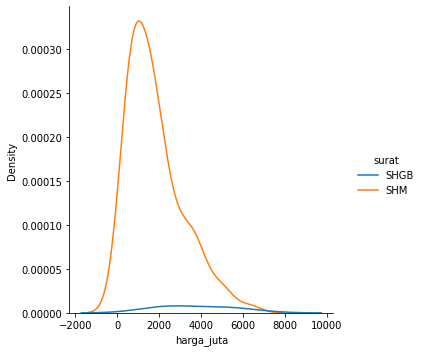

In [42]:
p = sns.displot(data=data2, x='harga_juta', hue='surat', kind='kde')

Dari grafik diatas menunjukkan bahwa perbedaan surat, baik itu SHM maupun SHGB, tidak memiliki perbedaan rentang harga rumah diantara keduanya

Text(0.5, 1.0, 'Korelasi pada data normal')

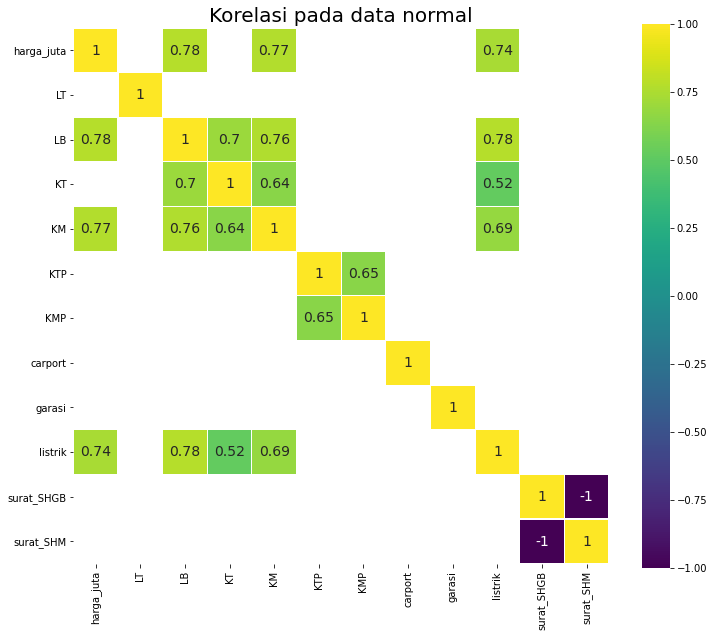

In [43]:
#cek korelasi antar variabel di data2
corr = data2.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);
plt.title('Korelasi pada data normal',fontsize=20)

Pada kasus ini, karena tidak ada variabel lokasi maka terlihat LT dan harga tidak memiliki korelasi yang signifikan. Namun berdasar domain knowledge, karna data diambil dari wilayah yang berbeda dengan harga jual tanah yang berbeda, didapatkan bahwa harga dan LT memiliki hubungan yang signifikan. 
Dari perhitungan korelasi, harga rumah memiliki hubungan yang erat dengan besarnya daya listrik, jumlah kamar mandi, dan luas bangunan.

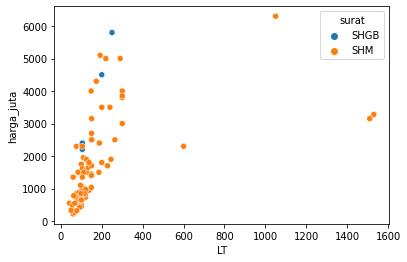

In [44]:
q = sns.scatterplot(x=data2['LT'], y=data2['harga_juta'], hue = data2['surat'])

Bisa kita simpulkan bahwa luas tanah belum tentu berbanding lurus dengan harga. Diperlukan juga domain knowledge, karena harga tanah belum tentu sama di daerah satu dengan daerah lainnya. Selain itu juga dipengaruhi oleh kualitas bangunan. 

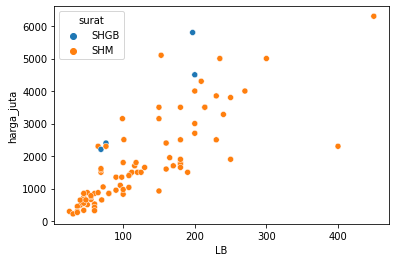

In [45]:
q = sns.scatterplot(x=data2['LB'], y=data2['harga_juta'], hue = data2['surat'])

Dapat kita simpulkan bahwa luas bangunan berbanding lurus dengan harga. Tapi tidak menutup kemungkinan ada beberapa data yang memiliki insight yang berbeda dari mayoritas data yang ada

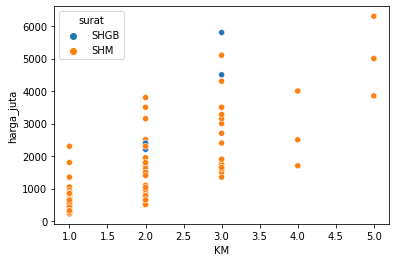

In [46]:
q = sns.scatterplot(x=data2['KM'], y=data2['harga_juta'], hue = data2['surat'])

Dapat disimpulkan bahwa properti dengan harga yang tinggi cenderung memiliki jumlah kamar mandi yang banyak

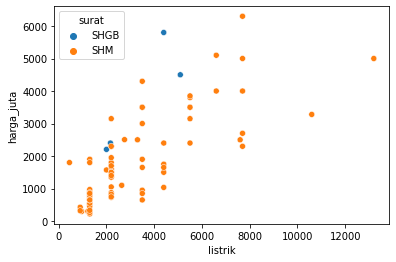

In [47]:
q = sns.scatterplot(x=data2['listrik'], y=data2['harga_juta'], hue = data2['surat'])

Dapat disimpulkan bahwa daya listrik cenderung berbanding lurus dengan harga rumah. 

# **Visualisasi pada data outliers**

Text(0.5, 1.0, 'Korelasi pada data outliers')

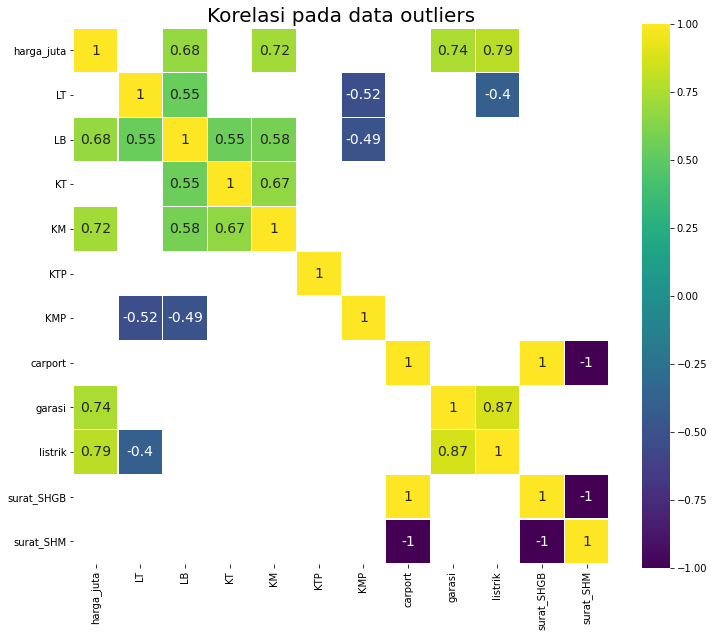

In [48]:
#cek korelasi antar variabel di data2
corr = data3.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);
plt.title('Korelasi pada data outliers',fontsize=20)

Pada kasus ini, karena tidak ada variabel lokasi maka terlihat LT dan harga tidak memiliki korelasi yang signifikan. Namun berdasar domain knowledge, karna data diambil dari wilayah yang berbeda dengan harga jual tanah yang berbeda, didapatkan bahwa harga dan LT memiliki hubungan yang signifikan. 
Dari perhitungan korelasi, harga rumah memiliki hubungan yang erat dengan besarnya daya listrik, garasi, jumlah kamar mandi, dan luas bangunan.

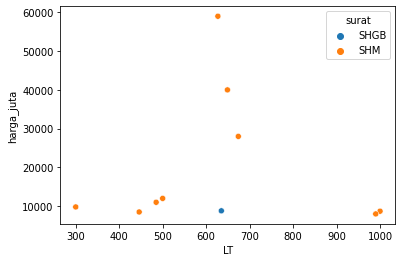

In [49]:
q = sns.scatterplot(x=data3['LT'], y=data3['harga_juta'], hue = data3['surat'])

Bisa kita simpulkan bahwa luas tanah belum tentu berbanding lurus dengan harga. Diperlukan juga domain knowledge, karena harga tanah belum tentu sama di daerah satu dengan daerah lainnya. Selain itu juga dipengaruhi oleh kualitas bangunan.

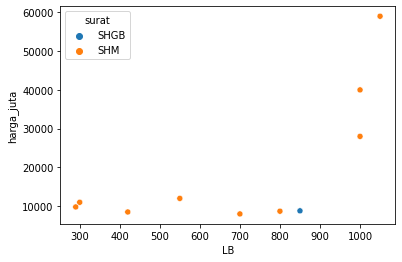

In [50]:
q = sns.scatterplot(x=data3['LB'], y=data3['harga_juta'], hue = data3['surat'])

Bisa kita simpulkan bahwa tidak semua luas bangunan berbanding lurus dengan harga rumah. Beberapa rumah memiliki luas bangunan yang lebih besar, namun memiliki harga yang rendah

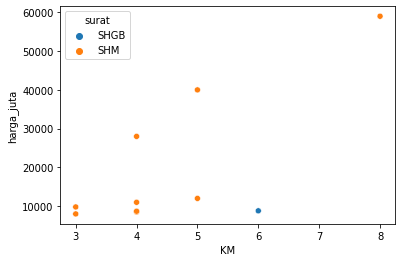

In [51]:
q = sns.scatterplot(x=data3['KM'], y=data3['harga_juta'], hue = data3['surat'])

Dapat disimpulkan bahwa properti dengan harga yang tinggi cenderung memiliki jumlah kamar mandi yang banyak

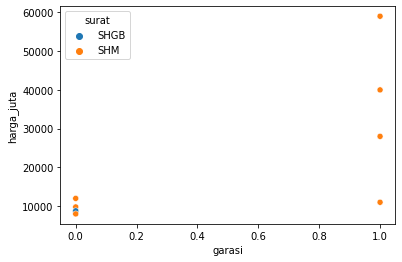

In [52]:
q = sns.scatterplot(x=data3['garasi'], y=data3['harga_juta'], hue = data3['surat'])

Dapat dilihat bahwa kebanyakan rumah dengan rentang harga 10 miliar, tidak memiliki garasi. Dan kebanyakan rumah yang memiliki garasi, memiliki harga yang tinggi

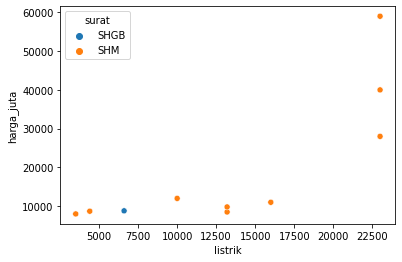

In [53]:
q = sns.scatterplot(x=data3['listrik'], y=data3['harga_juta'], hue = data3['surat'])

Bisa kita simpulkan bahwa tidak semua daya listrik berbanding lurus dengan harga rumah. Beberapa rumah memiliki daya listrik yang lebih besar, namun memiliki harga yang rendah

# **Clustering**

In [54]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 1.2MB 9.8MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=cffd6e294929255a3b135085661a75fdfb426193cc917580a70c9926620938dc
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=15834124531db76475de3fb5ee5a47e739b671f3a8030655e76d5334ee0153d6
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
--2021-04-17 10:28:26--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [55]:
import umap, tau_unsup as tau
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

#### Normalisasi

In [56]:
# Mengubah dataframe menjadi array
c_data = np.array(data2.iloc[:,:-3])
c_data[:5]

array([[5.000e+03, 2.900e+02, 3.000e+02, 4.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.320e+04],
       [3.500e+03, 2.000e+02, 2.140e+02, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 5.500e+03],
       [8.500e+02, 1.000e+02, 8.000e+01, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.300e+03],
       [1.572e+03, 1.050e+02, 6.900e+01, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.001e+03],
       [5.050e+02, 5.000e+01, 5.000e+01, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.300e+03]])

In [57]:
# Scaling data menggunakan MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
c_scaled = mm.fit_transform(c_data)
c_scaled[:5]

array([[0.78618421, 0.16666667, 0.64705882, 0.75      , 1.        ,
        0.        , 0.        , 0.5       , 0.5       , 1.        ],
       [0.53947368, 0.1061828 , 0.44470588, 0.5       , 0.25      ,
        1.        , 1.        , 0.5       , 0.5       , 0.39607843],
       [0.10361842, 0.03897849, 0.12941176, 0.5       , 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.06666667],
       [0.22236842, 0.04233871, 0.10352941, 0.25      , 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.12164706],
       [0.046875  , 0.00537634, 0.05882353, 0.25      , 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.06666667]])

In [58]:
# Mengubah array menjadi dataframe
c_scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.786184,0.166667,0.647059,0.75,1.00,0.0,0.0,0.5,0.5,1.000000
1,0.539474,0.106183,0.444706,0.50,0.25,1.0,1.0,0.5,0.5,0.396078
2,0.103618,0.038978,0.129412,0.50,0.25,0.0,0.0,0.5,0.0,0.066667
3,0.222368,0.042339,0.103529,0.25,0.25,0.0,0.0,0.5,0.0,0.121647
4,0.046875,0.005376,0.058824,0.25,0.25,0.0,0.0,0.5,0.0,0.066667


#### Elbow method

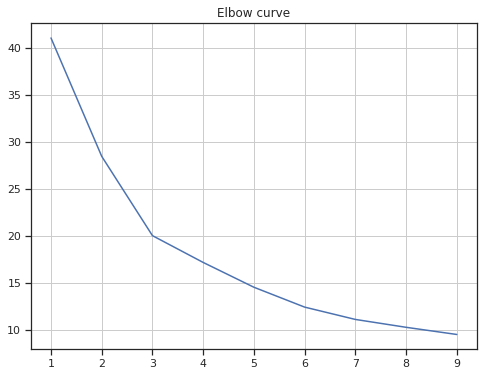

In [59]:
# Menggunakan Elbow Method untuk menentukan banyaknya cluster
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(c_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

Dengan menggunakan metode elbow method, didapatkan jumlah rekomendasi cluster adalah 3. Maka kami akan mengecek apabila cluster nya berjumlah 2, 3, dan 4

#### Visualisasi hasil clustering

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

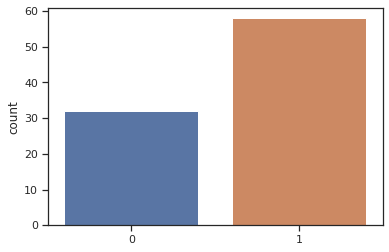

In [60]:
# Apabila jumlah cluster = 2
k=2
kmPP2 = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 99)
kmPP2.fit(c_scaled)
C_kmpp2 = kmPP2.predict(c_scaled)
 
sns.countplot(C_kmpp2)
C_kmpp2[:10]

array([0, 2, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

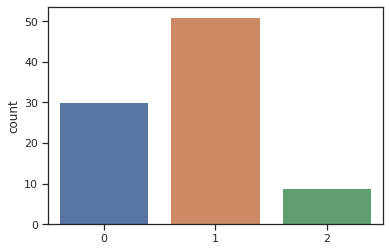

In [61]:
# Apabila jumlah cluster = 3
k=3
kmPP3 = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 99)
kmPP3.fit(c_scaled)
C_kmpp3 = kmPP3.predict(c_scaled)
 
sns.countplot(C_kmpp3)
C_kmpp3[:10]

array([3, 0, 2, 2, 2, 2, 1, 2, 1, 1], dtype=int32)

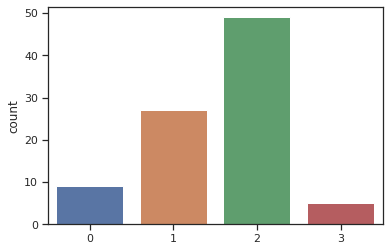

In [62]:
# Apabila jumlah cluster = 4
k=4
kmPP4 = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 99)
kmPP4.fit(c_scaled)
C_kmpp4 = kmPP4.predict(c_scaled)
 
sns.countplot(C_kmpp4)
C_kmpp4[:10]

#### Visualisasi spherical

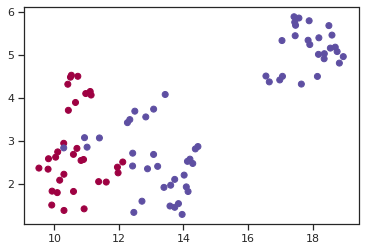

In [63]:
# Spherical menggunakan k=2
X2D = umap.UMAP(random_state=99).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp2, cmap='Spectral');

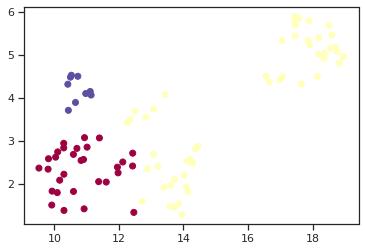

In [64]:
# Spherical menggunakan k=3
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp3, cmap='Spectral');

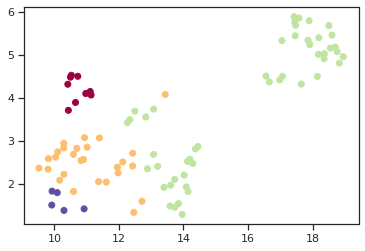

In [65]:
# Spherical menggunakan k=4
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp4, cmap='Spectral');

### Evaluasi clustering

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


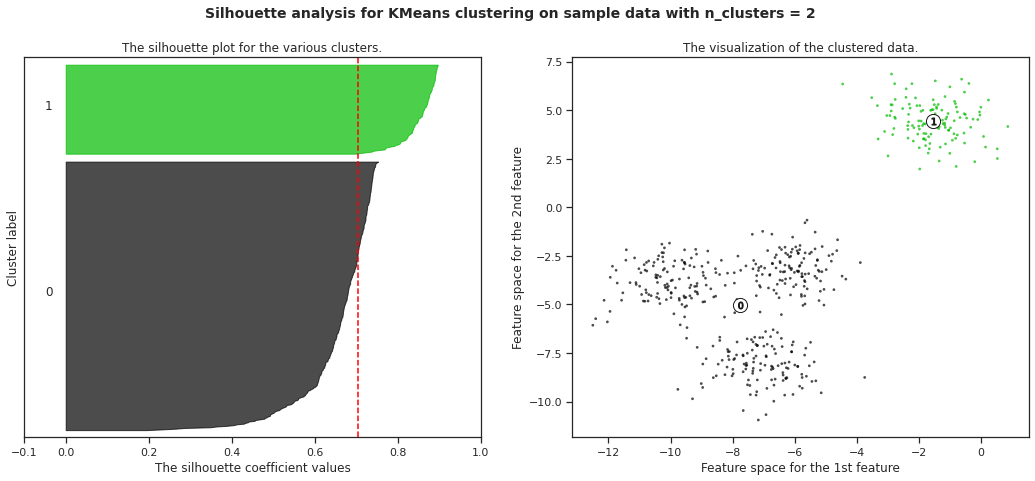

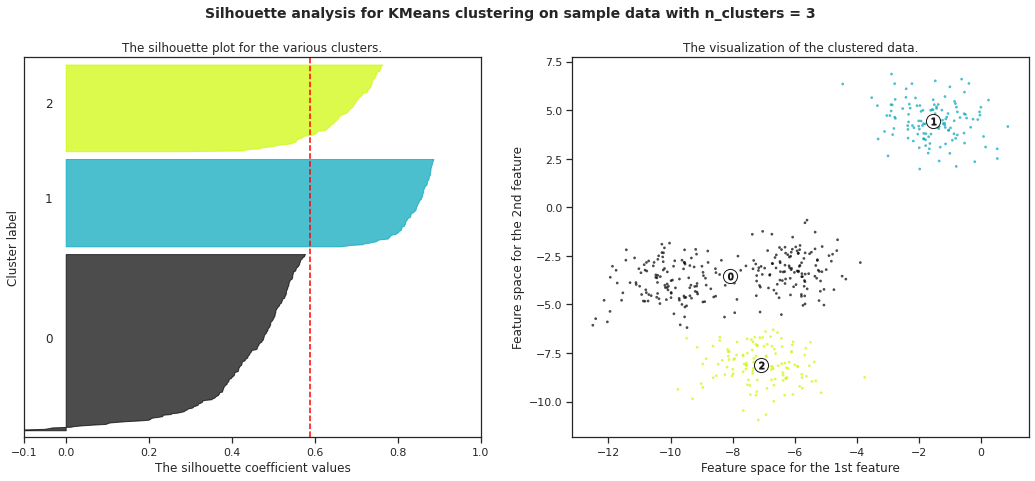

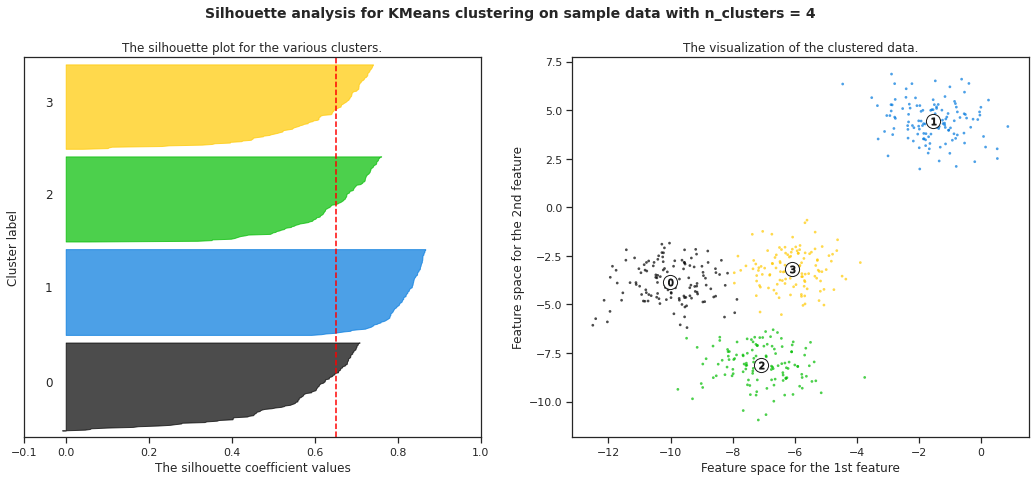

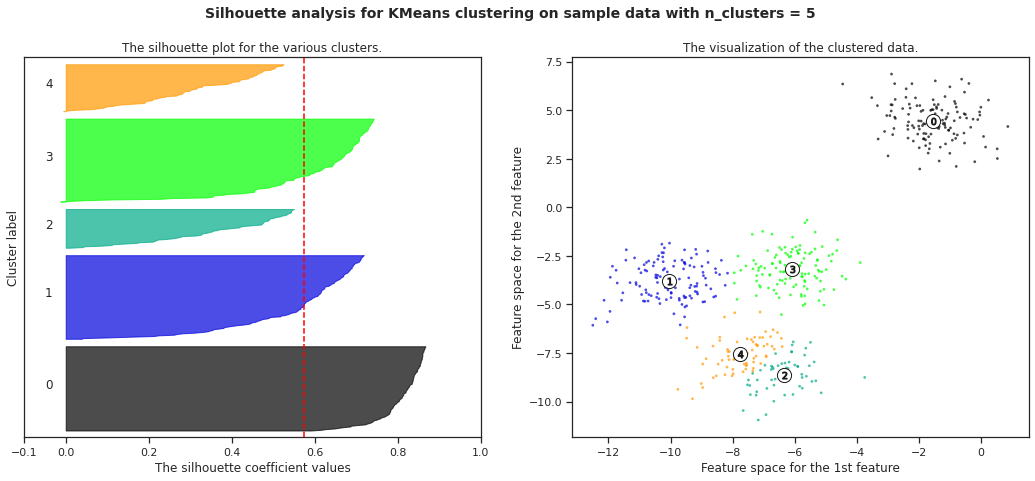

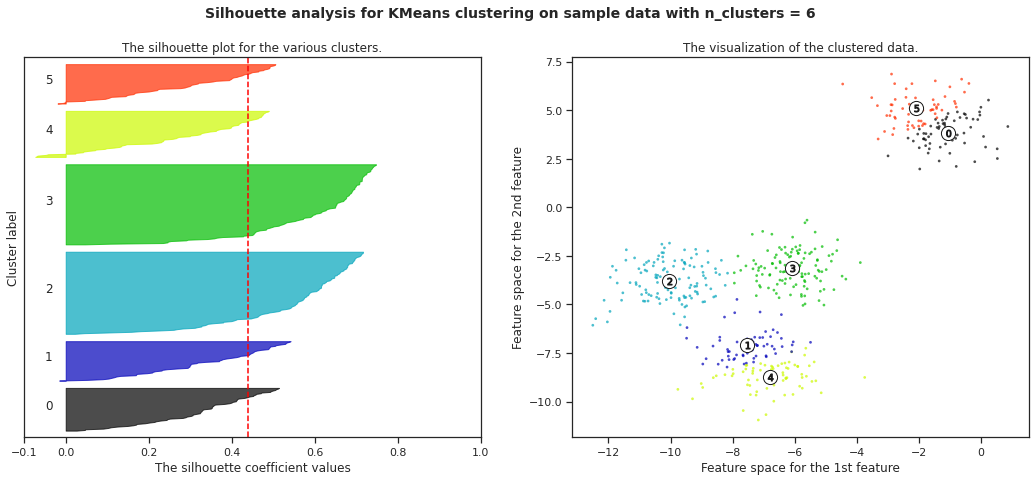

In [66]:
tau.sil_based_optimal_km()

In [67]:
Hasil_Clustering = [C_kmpp2, C_kmpp3, C_kmpp4]
for res in Hasil_Clustering:
    print(siluet(c_scaled,res), end=', ')

0.37908818709325814, 0.3984994061849588, 0.37766600342643314, 

Berdasarkan hasil visualisasi clustering dan hasil visualisasi siluet analysis, merekomendasikan untuk membagi data menjadi 4 cluster. 

### **Melihat letak centroid**

In [68]:
kmPP3.cluster_centers_

array([[ 4.61924342e-01,  1.86760753e-01,  4.15137255e-01,
         5.75000000e-01,  5.41666667e-01, -4.16333634e-17,
         6.93889390e-18,  4.83333333e-01,  1.83333333e-01,
         3.37762092e-01],
       [ 1.38315918e-01,  3.73576850e-02,  1.06113033e-01,
         2.94117647e-01,  1.17647059e-01,  4.16333634e-17,
         0.00000000e+00,  4.80392157e-01,  2.94117647e-02,
         1.11886198e-01],
       [ 4.16209795e-01,  9.86409797e-02,  3.61045752e-01,
         5.27777778e-01,  3.88888889e-01,  1.00000000e+00,
         4.44444444e-01,  4.44444444e-01,  1.66666667e-01,
         3.36784314e-01]])

### **Menarik kesimpulan dari k-means**

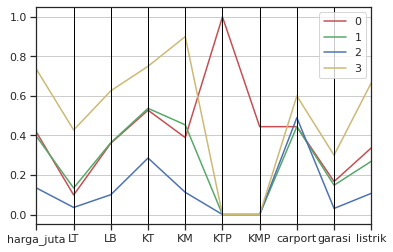

In [69]:
cols = ['harga_juta','LT','LB','KT','KM','KTP','KMP','carport','garasi','listrik']
dfC = pd.DataFrame(kmPP4.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index
 
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b', 'y'))
plt.show()

Cluster 0
* Memiliki fasilitas mulai dari harga, luas bangunan,jumlah kamar tidur, jumlah kamar mandi yang menengah
* Memiliki luas tanah yang menengah kebawah
* Rata rata rumah memiliki carport dan garasi
* Berbeda dari yang lain, kelompok ini memiliki fasilitas kamar tidur pembantu dan kamar mandi pembantu
* Memiliki daya listrik menengah keatas

Cluster 1
* Memiliki fasilitas mulai dari harga, luas bangunan,jumlah kamar tidur, jumlah kamar mandi, yang menengah
* Memiliki luas tanah yang menengah kebawah
* Rata-rata memiliki carport dan garasi
* Tidak memiliki kamar tidur pembantu dan kamar mandi pembantu
* Memiliki daya listrik menengah kebawah

Cluster 2
* Memiliki rata-rata harga dan fasilitas seperti luas tanah, luas bangunan, jumlah kamar tidur, jumlah kamar mandi dibawah cluster yang lain
* Tidak memiliki kamar tidur pembantu dan kamar mandi pembantu
* Rata-rata memiliki carport
* Hanya beberapa rumah yang memiliki garasi
* Memiliki daya listrik yang rendah

Cluster 3
* Memiliki rata-rata harga dan fasilitas seperti luas tanah, luas bangunan, jumlah kamar tidur, jumlah kamar mandi diatas cluster yang lain
* Tidak memiliki kamar tidur pembantu dan kamar mandi pembantu
* Kebanyakan rumah memiliki carport dan garasi
* Memiliki daya listrik yang tinggi

# **Rekomendasi Tindakan**

* Jika ingin membeli rumah untuk investasi, belilah rumah di cluster 1
* Jika ingin membeli rumah minimalis yang memiliki harga rendah, belilah rumah di cluster 2
* Rumah di cluster 2 cocok untuk pekerja berpenghasilan menengah ke bawah, dan tidak memiliki waktu untuk mengurus rumah. Rumah pada cluster 2 juga cocok untuk keluarga baru
* Rumah di cluster 0 cocok untuk keluarga berpenghasilan menengah ke atas yang memiliki pembantu ataupun jika ada sanak saudara yang ingin menginap
* Rumah di cluster 3 untuk orang yang berpenghasilan tinggi dan mempunyai keinginan memiliki rumah yang luas